# 시카고 샌드위치 맛집 분석

## 웹 데이터를 가져우는 Beautiful Soup 익히기

## Beautiful 패키지 임포트

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [2]:
pip list

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astroid                            2.3.1    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray                           1.0.1    
bkcharts                           0.2      
bleach                             3.1.0    
bokeh     

In [4]:
from bs4 import BeautifulSoup as bs

In [5]:
bs

bs4.BeautifulSoup

# soup 객체 생성하기
- soup객체명 = bs(주소/html경로, 'html.parser')
- soup객체명.prettify() : 포멧 프린팅

In [14]:
# 로컬상의 html 문서 읽기
page = open('../data/03. test_first.html','r').read()
type(page)
page

# 현재 이것은 soup객체로 만든것은 아니다 open을 이용해서 html파일을 읽어온 형태

'<!DOCTYPE html>\n<html>\n    <head>\n        <title>Very Simple HTML Code by PinkWink</title>\n    </head>\n    <body>\n        <div>\n            <p class="inner-text first-item" id="first">\n                Happy PinkWink.\n                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>\n            </p>\n            <p class="inner-text second-item">\n                Happy Data Science.\n                <a href="https://www.python.org" id="py-link">Python</a>\n            </p>\n        </div>\n        <p class="outer-text first-item" id="second">\n            <b>\n                Data Science is funny.\n            </b>\n        </p>\n        <p class="outer-text">\n            <b>\n                All I need is Love.\n            </b>\n        </p>\n    </body>\n</html>'

In [21]:
# soup 객체 만들기
soup= bs(page, 'html.parser')
soup
print(soup.prettify()) # 이렇게하면 들여쓰기가 된다 (print 해야함!)

# 우리에게 익숙한 형태의 모습으로 보여진당

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


## soup 객체 리스트화
- list(soup객체)

In [35]:
list(soup)

# 실제 html 소스는 2번 인덱스부터 시작
list(soup)[2]

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

In [ ]:
# 실제 html 소스 부분을 변수로 저장 (위에거랑 같은소리인듯)

In [39]:
html = list(soup.children)[2]
html

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

## head와 body부분으로 분리시키기

In [52]:
head = list(html.children)[1]
head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

In [54]:
list(html.children)[2]

'\n'

In [50]:
body = list(html.children)[3]
body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

# 메소드 이용하기
- soup.find_all('p') : 모든 p
- soup.find('p') : 첫번째 p
- soup.find_all('p',class_='outer-text) : outer-text가 클래스가 적용된 p
- soup.find_all(class='outer-text') : outer-text 클래스가 적용된 모든 요소
- soup.find_all(id='first') : 아이디가 적용된 요소

# 트리구조로 찾아가기

- soup.요소1.요소2.요소3...

In [57]:
soup.head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

In [56]:
soup.body.p
soup.body.p.a

<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>

### 문서에 있는 모든 특정 태그 요소를 찾아라
- soup.find_adll('태그명') => 리스트

In [66]:
# 문서에 있는 p 태그 개수는?
len(soup.find_all('p'))

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

### 문서에 있는 첫번째로 표시되는 특정 태그 요소를 찾아라
- soup.find('태그명')

In [67]:
# 첫번째 p
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

### 문서에 있는 outer-text 클래스가 적용된 p 태그를 찾아라
- soup.find_all('태그명', class='클래스명')

In [69]:
soup.find_all('p', class_='outer-text') # _(언더바) 필수!

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

### 문서에 있는 class값이 'outer-text'로 지정된 모든 태그를 찾아라
(위에는 p태그만 이거는 다른태그도 포함)
- soup.find_all(class_='outer-text')

In [74]:
soup.find_all(class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

### 문서에 있는 id값이 'first'로 지정된 p 태그를 찾아라
- soup.find_all(id='first')

In [72]:
soup.find_all('p', id='first')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

### 속성

- next_sibling : 다음 레벨
- previous_sibling : 이전 레벨

In [80]:
# div > p
soup.body.div.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

In [85]:
soup.body.div.p.next_sibling

'\n'

In [91]:
soup.body.previous_sibling
soup.body.previous_sibling.previous_sibling

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

### for 반목문을 이용하여 p 태그안의 문자열 출력하기

In [104]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())               # get_text()는 태그안의 문자열 추출!!!


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



## title 태그안의 글자만 출력해라

### get_text() / string

In [111]:
soup.head.title.string

'Very Simple HTML Code by PinkWink'

## 첫번째 a 태그안의 텍스트를 출력하여라

In [117]:
soup.body.div.a.get_text()
soup.body.find('a').string

'PinkWink'

### 태그안의 속성값 추출하기
- 태그요소['속성']

### 모든 a 태그의 주소를 찾아라

In [121]:
links = soup.find_all('a')
links

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <a href="https://www.python.org" id="py-link">Python</a>]

In [129]:
soup.find_all('a')[0]['href']
soup.find_all('a')[1]['href']

for i in links:
    print(i.text + ' -> ' + i['href'])

PinkWink -> http://www.pinkwink.kr
Python -> https://www.python.org


# 크롬 개발자 도구를 이용해서 원하는 태그 찾기

실제로는 로컬에서 크롤링하는 경우는 없겟져. 웹 상에서 해보겠다.
    

In [132]:
from urllib.request import urlopen

In [136]:
page = urlopen('http://yes24.com')
soup = bs(page, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=1170" name="viewport"/>
<title>YES24 | 대한민국 대표 인터넷서점</title>
<meta content="YES24 - 대한민국 대표 인터넷서점" name="title"/>
<meta content="YES24는 대한민국 1위 인터넷 온라인 서점 입니다. 국내 최대의 도서정보를 보유하고 있으며, 음반, DVD, 공연, 영화까지 다양한 문화 콘텐츠 및 서비스를 제공합니다." name="description"/>
<meta content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 영화, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘" name="keywords"/>
<meta content="https://secimage.yes24.com/sysimage/renew/logo_meta.png" property="og:image"/>
<script src="https://secimage.yes24.com/sysimage/Contents/Scripts/p/jquery/jquery-1.2.6.min.js" type="text/javascript"></script>
<script src="https://secimage.yes24.com/sysimage/Contents/Scripts/p/jquery/jquery.menu-aim.js?v=20140801" type="text/javascript"></script>
<scri

## h1태그안의 이미지(image) 주소를 출력해라

In [147]:
soup.body.h1.image['src']

'http://image.yes24.com/sysimage/renew/gnb/logoN2.png'

In [ ]:
<a class="rnk_lnk" href="/Product/Goods/87306110" target="_self" onclick="setWcode('010_006');" title="양준일 MAYBE 너와 나의 암호말 양준일,아이스크림 저 모비딕북스">'양준일 MAYBE 너와 나의 암호말' 상품상세로 이동</a>

In [152]:
soup.find_all(class_='rnk_lnk')[0].string

"'양준일 MAYBE 너와 나의 암호말' 상품상세로 이동"

In [159]:
# 반목분으로 클래스가 적용된 a 태그안의 텍스트 출력하기
# for i in :
resultList = soup.find_all(class_='rnk_lnk')
for row in resultList:
    print(row.string)

'양준일 MAYBE 너와 나의 암호말' 상품상세로 이동
'추리 천재 엉덩이 탐정 9' 상품상세로 이동
'흔한남매 3' 상품상세로 이동
'마법천자문 47' 상품상세로 이동
'지적 대화를 위한 넓고 얕은 지식 제로' 상품상세로 이동
'1일 1페이지, 세상에서 가장 짧은 교양 수업 365' 상품상세로 이동
'스스로 행복하라' 상품상세로 이동
'아내를 모자로 착각한 남자' 상품상세로 이동
'에이트' 상품상세로 이동
'설민석의 세계사 대모험 4' 상품상세로 이동


In [167]:
count = 1
for row in resultList:
    print(count, '위 => ', row.string[:-9])
    print('herf : ' + row['href'])
    count += 1

1 위 =>  '양준일 MAYBE 너와 나의 암호말'
herf : /Product/Goods/87306110
2 위 =>  '추리 천재 엉덩이 탐정 9'
herf : /Product/Goods/86003594
3 위 =>  '흔한남매 3'
herf : /Product/Goods/85350206
4 위 =>  '마법천자문 47'
herf : /Product/Goods/86938252
5 위 =>  '지적 대화를 위한 넓고 얕은 지식 제로'
herf : /Product/Goods/84659792
6 위 =>  '1일 1페이지, 세상에서 가장 짧은 교양 수업 365'
herf : /Product/Goods/81503945
7 위 =>  '스스로 행복하라'
herf : /Product/Goods/85465381
8 위 =>  '아내를 모자로 착각한 남자'
herf : /Product/Goods/30548896
9 위 =>  '에이트'
herf : /Product/Goods/80499154
10 위 =>  '설민석의 세계사 대모험 4'
herf : /Product/Goods/86013875


### soup.find_all(text='찾고자하는 내용')

- 내용으로 찾기

이거도 있긴한데 강사님 못해서 넘어감;

# 실전 : 시카고 샌드위치 맛집 소개 사이트에 접근하기


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" r
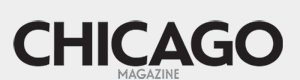

In [174]:
url_base ='https://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = bs(html, 'html.parser')

soup

### 'sammy' 클래스가 적용된 div 태그를 찾아라

In [177]:
soup.find_all('div', 'sammy')

[<div class="sammy" style="position: relative;">
 <div class="sammyRank">1</div>
 <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
 Old Oak Tap<br>
 <em>Read more</em> </br></br></a></div>
 </div>, <div class="sammy" style="position: relative;">
 <div class="sammyRank">2</div>
 <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
 Au Cheval<br/>
 <em>Read more</em> </a></div>
 </div>, <div class="sammy" style="position: relative;">
 <div class="sammyRank">3</div>
 <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
 Xoco<br/>
 <em>Read more</em> </a></div>
 </div>, <div class="sammy" style="position: relative;">
 <div class="sammyRank">4</div>
 <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwic

In [183]:
print('전체개수는? : ' , len(soup.find_all('div', 'sammy')))

전체개수는? :  50


In [185]:
soup.find_all('div','sammy')[0]

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>

# 접근한 웹 페이지에서 원하는 데이터 추출하고 정리하기

In [186]:
temp_one = soup.find_all('div', 'sammy')[0]

In [197]:
temp_one.find(class_='sammyRank').string

'1'

In [209]:
temp_one.find(class_='sammyListing').string        # ?? 두개 같은거람서 이건왜 안되고
temp_one.find(class_='sammyListing').get_text()    # 이건 왜 되냐 ?????

In [212]:
temp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'